In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns

In [2]:
# x_original=pd.read_csv('../XLable_onlyDiabeticRemoved.txt')
# y_original=pd.read_csv('../TargetLable_onlyDiabeticRemoved.txt')

x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

y_original=y_original[['Unnamed: 0','L103000']]

In [3]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
 
#combine FIELD_6 and FIELD_7 both represent the same thing (Women's marital status)
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7','B_DAY'])
print(data.shape)

(159381, 407)


In [4]:
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia

print(data.shape)

(159381, 407)


In [5]:
mydata=data[['L103000_y','L103000_x', 'L100700', 'L101700', 'S000300', 'S000502', 'FIELD_33',
       'L190000', 'L100800', 'L101600', 'S000501' ]].dropna() 

print(mydata.shape)

mydata.head()

(145071, 11)


,L103000_y,L103000_x,L100700,L101700,S000300,S000502,FIELD_33,L190000,L100800,L101600,S000501
0,53.0,53.0,3.0,13.0,20.1,67.0,1.0,4.08,77.0,49.0,121.0
1,41.0,53.0,3.0,14.0,19.7,76.0,1.0,3.14,89.0,51.0,117.0
2,50.0,41.0,3.8,15.0,20.2,82.0,1.0,4.46,78.0,56.0,135.0
3,50.0,58.0,3.7,10.0,24.8,71.0,1.0,4.26,95.0,42.0,118.0
4,41.0,50.0,3.4,12.0,25.5,65.0,1.0,5.14,90.0,46.0,111.0


In [6]:
for i in mydata.columns:
    if (i != 'L103000_y'): 
        mydata['p_'+i]=np.power(mydata[i],0.03)
        mydata['p_'+i]=np.power(mydata[i],3)
#         mydata['l_'+i]=np.log10(mydata[i])

mydata=mydata.dropna()

print(mydata.shape)
mydata.head()

# mydata=np.log2(mydata).dropna()
# mydata=np.power(mydata,0.03)

(145071, 21)


,L103000_y,L103000_x,L100700,L101700,S000300,S000502,FIELD_33,L190000,L100800,L101600,...,p_L103000_x,p_L100700,p_L101700,p_S000300,p_S000502,p_FIELD_33,p_L190000,p_L100800,p_L101600,p_S000501
0,53.0,53.0,3.0,13.0,20.1,67.0,1.0,4.08,77.0,49.0,...,148877.0,27.000,2197.0,8120.601,300763.0,1.0,67.917312,456533.0,117649.0,1771561.0
1,41.0,53.0,3.0,14.0,19.7,76.0,1.0,3.14,89.0,51.0,...,148877.0,27.000,2744.0,7645.373,438976.0,1.0,30.959144,704969.0,132651.0,1601613.0
2,50.0,41.0,3.8,15.0,20.2,82.0,1.0,4.46,78.0,56.0,...,68921.0,54.872,3375.0,8242.408,551368.0,1.0,88.716536,474552.0,175616.0,2460375.0
3,50.0,58.0,3.7,10.0,24.8,71.0,1.0,4.26,95.0,42.0,...,195112.0,50.653,1000.0,15252.992,357911.0,1.0,77.308776,857375.0,74088.0,1643032.0
4,41.0,50.0,3.4,12.0,25.5,65.0,1.0,5.14,90.0,46.0,...,125000.0,39.304,1728.0,16581.375,274625.0,1.0,135.796744,729000.0,97336.0,1367631.0


In [7]:
# x=mydata[['L103000_x', 'S000501', 'L100700', 'SEX', 'L103100', 'L190300', 'L190400', 
#              'L101300', 'S000502']] 

x=mydata.iloc[:,1:]
y=mydata[['L103000_y']]

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, random_state=42, test_size=0.2)

In [9]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=50)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[0.48501551 0.00955214 0.01595616 0.00500223 0.00176125 0.00086611
 0.00717878 0.00453694 0.00460927 0.00208762 0.41121989 0.0081926
 0.01536713 0.0055369  0.00212769 0.00107345 0.00654825 0.00600781
 0.00458085 0.00277941]


mean_squared_error 4184.870650697749
root mean_squared_error 64.69057621244185
mean_absolute_error 37.74418613156114
r2_score 0.5076213081024641


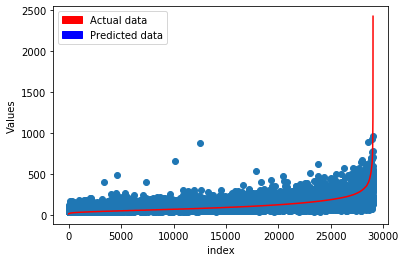

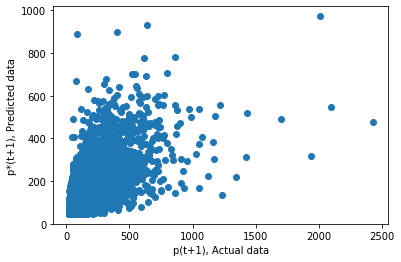

In [10]:
import math
print('mean_squared_error',m.mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(m.mean_squared_error(ytest, ypred)))
print('mean_absolute_error',m.mean_absolute_error(ytest, ypred))
print('r2_score',m.r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred 
ypredPD.tail(10)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])


In [11]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 10, alpha = 200, n_estimators = 50, 
                          booster='gbtree',
                          colsample_bytree = 0.6,learning_rate = 0.08,gamma=10, tree_method = 'gpu_hist'
                         )

xg_reg.fit(xtrain, ytrain) 

XGBRegressor(alpha=200, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=10,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

mean_squared_error 4326.621216718946
root mean_squared_error 65.77705691743091
mean_absolute_error 37.653610029652796
r2_score 0.49094338323957365


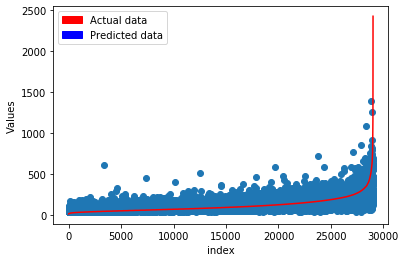

,t + 1,pred (t +1)
28465,18.0,52.114128
10128,19.0,53.310062
24358,19.0,50.207378
19724,19.0,45.622158
7587,20.0,44.324268
19032,20.0,35.305676
17063,20.0,45.501881
3685,20.0,51.850494
15612,20.0,49.434570
11604,20.0,78.848907


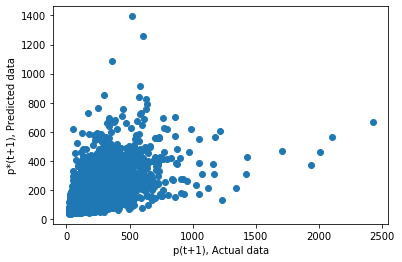

In [12]:
ypred = xg_reg.predict(xtest)
 
import math
print('mean_squared_error',m.mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(m.mean_squared_error(ytest, ypred)))
print('mean_absolute_error',m.mean_absolute_error(ytest, ypred))
print('r2_score',m.r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)


import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)